# 모듈 임포트 및 데이터 로드

In [1]:
from tqdm.auto import tqdm
import random
import os

import torch

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

c:\dev\webProject\miniproject\miniproject\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ModuleNotFoundError: No module named 'pandas_datareader'

In [ ]:
def reset_seeds(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

reset_seeds()

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
!pip install -U finance-datareader

In [ ]:
import FinanceDataReader as fdr

In [ ]:
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,73300,1,200,0.27,73800,74000,73200,15419815,1134484297093,437585060915000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,140000,1,3300,2.41,137000,140000,137000,5011719,698129501600,101920331100000,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,422000,2,-500,-0.12,426500,431000,422000,341008,144990527500,98748000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,703000,1,5000,0.72,702000,705000,700000,59749,41991591000,50035322000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,59300,2,-600,-1.00,59900,60100,59300,1609498,95959015300,48797181310000,822886700,STK


In [ ]:
df_kospi = df_krx[df_krx['Market'] == 'KOSPI']
df_kospi

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,73300,1,200,0.27,73800,74000,73200,15419815,1134484297093,437585060915000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,140000,1,3300,2.41,137000,140000,137000,5011719,698129501600,101920331100000,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,422000,2,-500,-0.12,426500,431000,422000,341008,144990527500,98748000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,703000,1,5000,0.72,702000,705000,700000,59749,41991591000,50035322000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,59300,2,-600,-1.00,59900,60100,59300,1609498,95959015300,48797181310000,822886700,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2771,002785,KR7002781003,진흥기업우B,KOSPI,,5020,1,25,0.50,4990,5040,4895,548,2692490,4303234360,857218,STK
2773,014915,KR7014911002,성문전자우,KOSPI,,6730,2,-350,-4.94,7540,7540,6700,3076,21072330,4038000000,600000,STK
2774,001525,KR7001521004,동양우,KOSPI,,6150,1,30,0.49,6120,6290,6060,1172,7220820,3799045650,617731,STK
2777,002787,KR7002782001,진흥기업2우B,KOSPI,,12750,1,160,1.27,12610,12750,12470,105,1394450,3758802000,294808,STK


# 종목명을 받아 종목코드를 찾아 반환하는 함수

In [ ]:
def item_code_by_item_name(item_name):
    """
    종목명을 받아 종목코드를 찾아 반환하는 함수
    """
    item_code_list = df_kospi.loc[df_kospi["Name"] == item_name, "Code"].tolist()
    if len(item_code_list) > 0:
        item_code = item_code_list[0]
        return item_code
    else:
        return "없는 주식입니다 !"

# 종목명을 넘겨주면 일별시세를 반환하는 함수

In [ ]:
def find_item_list(item_name, year=2020):
    """
    종목명을 넘겨주면 일별시세를 반환하는 함수
    내부에서 종목명으로 종목코드를 반환하는 함수(item_code_by_item_name)로
    종목의 시세를 수집합니다.
    """

    item_code = item_code_by_item_name(item_name)
    if item_code:
        df_day = fdr.DataReader(item_code, str(year))
        return df_day
    else:
        return False

In [ ]:
df = find_item_list("삼성전자", year = 2020)
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921
...,...,...,...,...,...,...
2023-12-11,72800,73000,72200,73000,9861960,0.005510
2023-12-12,73300,73500,73100,73500,13758646,0.006849
2023-12-13,73300,73500,72800,72800,13116766,-0.009524


# 시각화

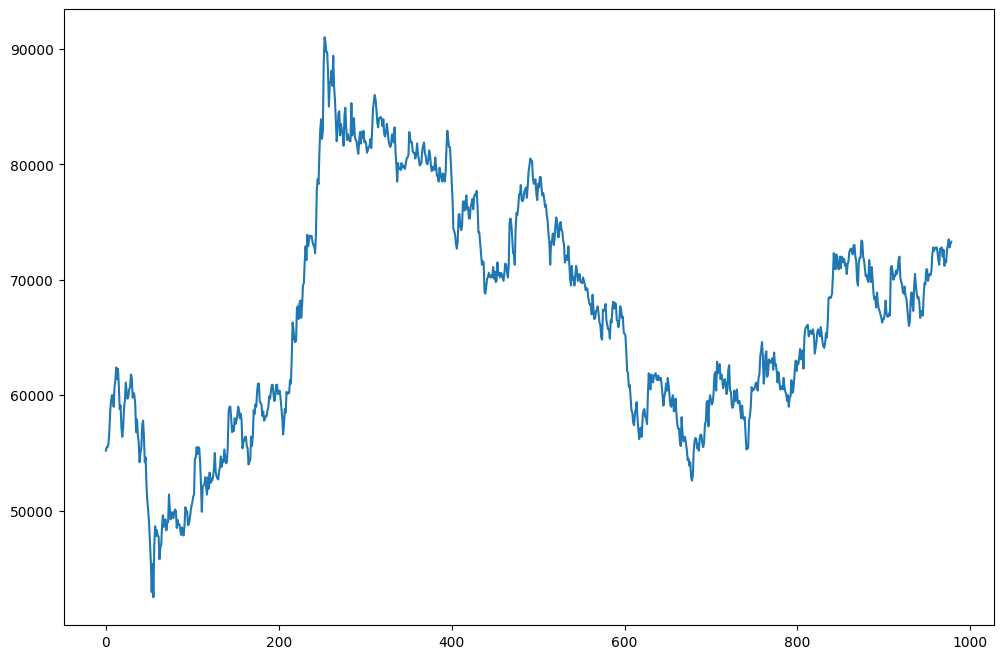

In [ ]:
data = df['Close'].values

plt.figure(figsize=(12, 8))
plt.plot(data)
plt.show()

# 스케일링 및 사이즈 변경


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

data = np.array(data).reshape(-1,1)    # 표준화를 하기 위해 사이즈를 (-1,1)로 조정

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(data)
scaled[1]

array([0.26804124])

In [ ]:
test_idx = int(len(scaled) * 0.8)

train = scaled[:test_idx]
test = scaled[test_idx:]

In [ ]:
df['ds'] = pd.to_datetime(df.index)
df['y'] = df['Close']

In [ ]:
df[['ds', 'y']].iloc[:-10]

,ds,y
Date,,
2020-01-02,2020-01-02,55200
2020-01-03,2020-01-03,55500
2020-01-06,2020-01-06,55500
2020-01-07,2020-01-07,55800
2020-01-08,2020-01-08,56800
...,...,...
2023-11-27,2023-11-27,71300
2023-11-28,2023-11-28,72700
2023-11-29,2023-11-29,72700


# 모델 세팅 및 학습, 예측

In [ ]:
!pip install pystan

In [ ]:
!pip install prophet

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4d9d867w/vsqb28xw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4d9d867w/_0k6kl4m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61106', 'data', 'file=/tmp/tmp4d9d867w/vsqb28xw.json', 'init=/tmp/tmp4d9d867w/_0k6kl4m.json', 'output', 'file=/tmp/tmp4d9d867w/prophet_model4muwddjl/prophet_model-20231216144212.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:42:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:42:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


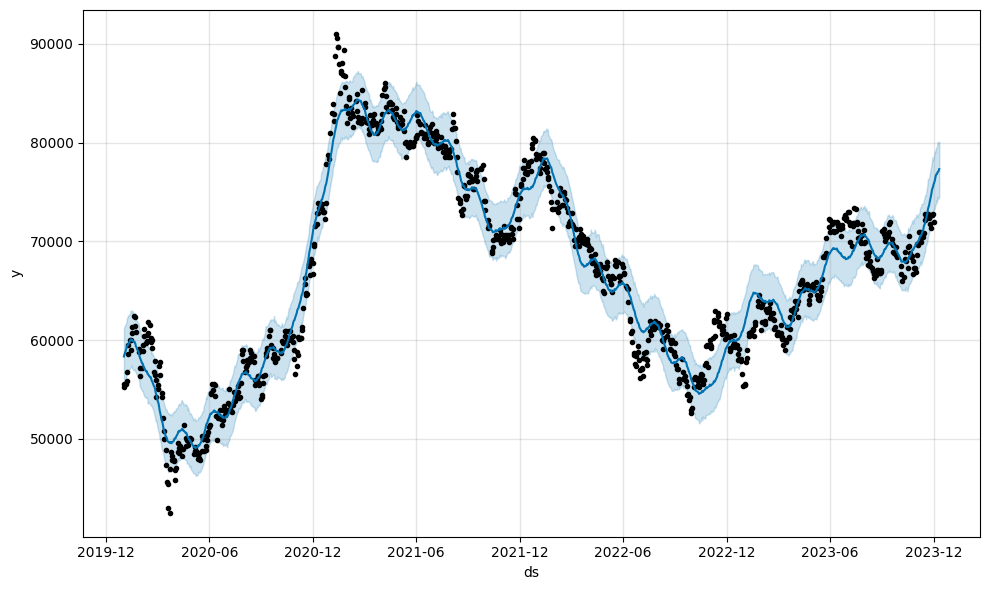

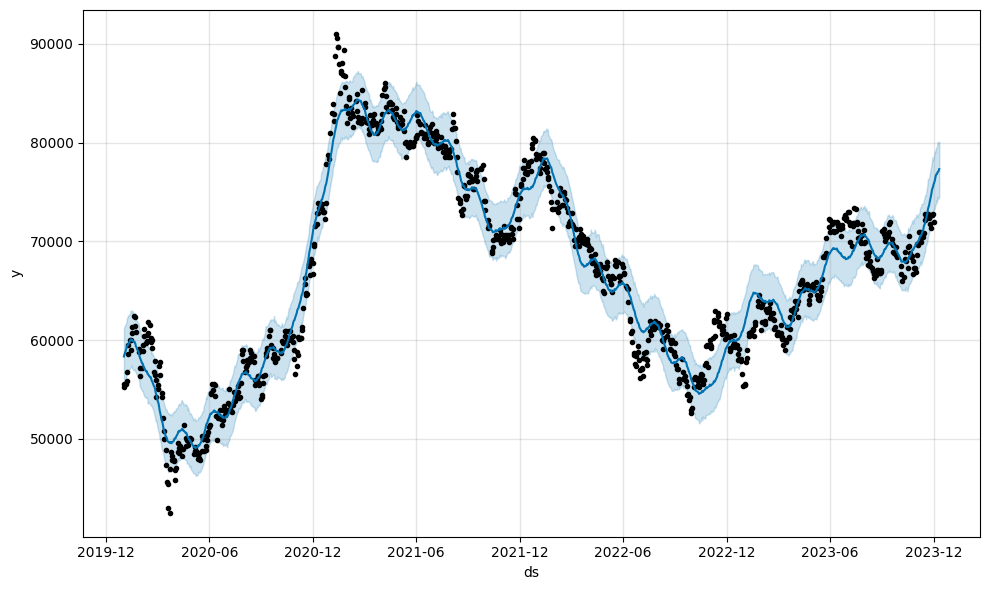

In [ ]:
# prophet 모듈 세팅
from prophet import Prophet

# Day 단위로 데이터가 구성되어 있으므로, 일 단위 주기성 활성화
model = Prophet(daily_seasonality=True)

# 데이터 학습 시작 -> 기계학습
model.fit(df[['ds', 'y']].iloc[:-10])

# 주가 예측 위한 날짜 데이터 세팅 -> 기존 데이터 + 향후 14일치 예측값
future = model.make_future_dataframe(periods=10)

# 주가 예측
forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(11)

# 모델이 제공하는 시각화
model.plot(forecast)

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-02,58332.431756,55655.853000,61159.422374
1,2020-01-03,58550.083818,55744.648694,61373.960001
2,2020-01-06,59061.021200,56275.741474,61671.892385
3,2020-01-07,59345.678021,56629.656019,62151.716958
4,2020-01-08,59459.926040,56632.098192,62232.347396
...,...,...,...,...
974,2023-12-07,76814.400534,73900.726759,79604.989349
975,2023-12-08,76990.930592,74504.509873,80048.469618
976,2023-12-09,77037.370296,74374.833065,79937.877911
977,2023-12-10,77145.077706,74297.204779,79998.894439


In [ ]:
model = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality=True,
                 weekly_seasonality=True,
                 daily_seasonality=True,
                 changepoint_prior_scale=0.5)

# 데이터 학습 시작 -> 기계학습
model.fit(df[['ds', 'y']])

# 주가 예측 위한 날짜 데이터 세팅 -> 기존 데이터 + 향후 10일치 예측값
future = model.make_future_dataframe(periods=14)

forecast = model.predict(future)

target_changes = forecast['yhat'].tail(14)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4d9d867w/hqkn7c5n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4d9d867w/s1ifqub9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43908', 'data', 'file=/tmp/tmp4d9d867w/hqkn7c5n.json', 'init=/tmp/tmp4d9d867w/s1ifqub9.json', 'output', 'file=/tmp/tmp4d9d867w/prophet_model0jl0xlvs/prophet_model-20231216144214.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:42:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:42:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2020-01-02,56909.033916,54822.980363,59046.986457
1,2020-01-03,57138.266923,55011.741113,59080.206246
2,2020-01-06,57683.995759,55447.841785,59784.759946
3,2020-01-07,57948.488820,55879.849953,60131.518856
4,2020-01-08,58072.475015,55978.168615,60171.419370
...,...,...,...,...
988,2023-12-25,71125.684001,68901.330421,73375.526450
989,2023-12-26,71264.679999,69226.499519,73418.645475
990,2023-12-27,71254.992818,69128.384172,73359.490006
991,2023-12-28,71282.018395,69274.347121,73371.979269


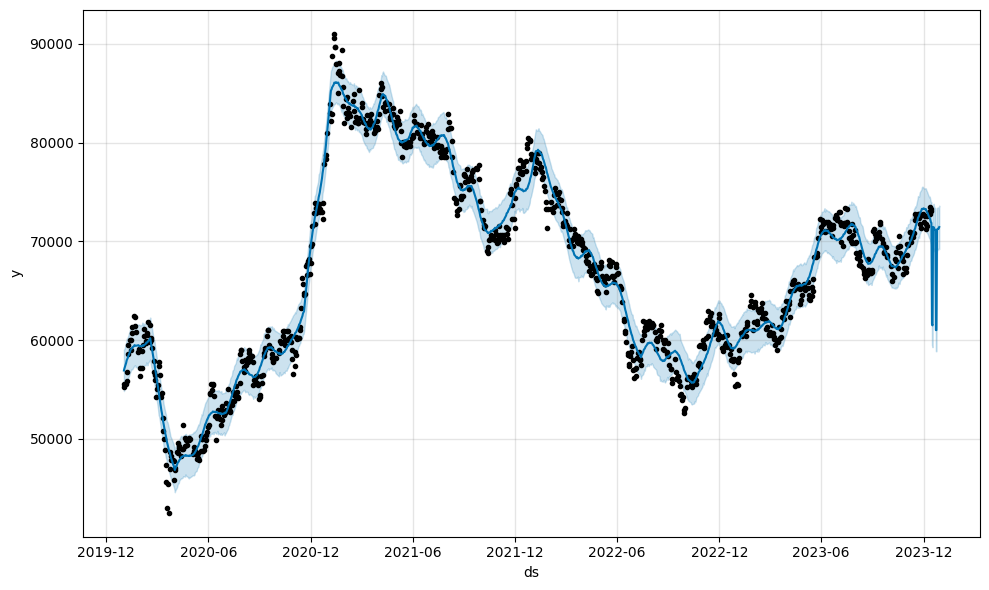

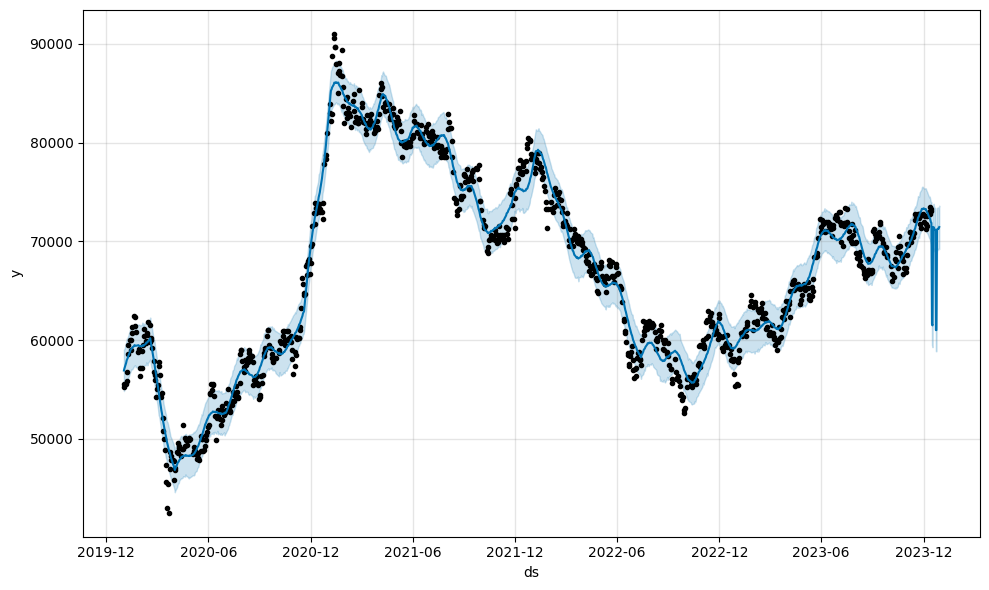

In [ ]:
model.plot(forecast)

In [ ]:
future_pred = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(14)

# 예측 구성요소 확인

In [ ]:
model.plot_components(forecast)
plt.show()